In [1]:
import tdmh
import requests
from nltk.corpus import stopwords
import re

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [2]:
txt_url = 'https://www.gutenberg.org/files/4217/4217-0.txt'

## Download full text

In [3]:
full_text = ''
response = requests.get(txt_url)
if response:
    full_text = response.text
    full_text = tdmh.remove_pg_boilerplate(full_text)
    full_text = re.sub( r'â' , "'" , full_text )

## Make a list with the various chapters

In [4]:
lines = re.split('\n', full_text )
chapters = []
chapter_text = ''
for line in lines:
    if re.search( r'^Chapter\s+\w+' , line , re.IGNORECASE ):
        chapters.append(chapter_text)
        chapter_text = ''
    else:
        chapter_text += line + '\n'
        
if len(chapter_text) > 0:
    chapters.append(chapter_text)
    
del chapters[0]

## Calculate word frequencies

In [18]:
words = tdmh.tokenise(full_text)
freq = dict()
for w in words:
    w = w.lower()
    w = w.encode("ascii", errors="ignore").decode()
    freq[w] = freq.get(w,0)+1

In [19]:
maximum = 30

for w in list(tdmh.sortedByValue(freq,ascending=False))[:maximum]:
    print(w,'\t',freq[w])

the 	 5909
and 	 3372
of 	 3150
a 	 1949
to 	 1928
he 	 1852
his 	 1743
in 	 1534
was 	 1066
that 	 948
had 	 902
it 	 849
him 	 703
you 	 698
said 	 614
with 	 572
i 	 540
on 	 535
for 	 528
from 	 483
at 	 478
as 	 470
not 	 447
is 	 446
by 	 396
they 	 382
stephen 	 371
be 	 361
but 	 355
were 	 337


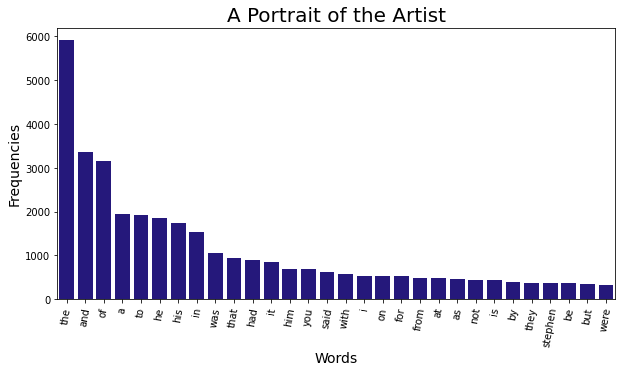

In [21]:
most_frequent = dict()

for word in list(tdmh.sortedByValue(freq,ascending=False))[:maximum]:
    most_frequent[word] = freq[word]
    
import matplotlib.pyplot as plt
import seaborn as sns


fig = plt.figure( figsize=( 10 , 5 ) )



graph = sns.barplot( x= list(most_frequent.keys()), y= list(most_frequent.values()) , color = '#19078c' , dodge=False )

graph.set_title('A Portrait of the Artist' , size = 20) 
graph.set_xlabel('Words' , size = 14) 
graph.set_ylabel('Frequencies' , size = 14 )

plt.xticks(rotation= 80)

plt.show()


## Most frequent words: ignoring stopwords

In [5]:
words = tdmh.tokenise(full_text)
freq = dict()
for w in words:
    if w not in list(stop_words):
        w = w.lower()
        w = w.encode("ascii", errors="ignore").decode()
        freq[w] = freq.get(w,0)+1
    

In [17]:
maximum = 30

for w in list(tdmh.sortedByValue(freq,ascending=False))[:maximum]:
    print(w,'\t',freq[w])

said 	 614
stephen 	 371
would 	 275
like 	 219
one 	 217
god 	 191
eyes 	 172
soul 	 170
father 	 151
could 	 149
mr 	 136
little 	 130
life 	 129
face 	 128
cranly 	 124
dedalus 	 123
first 	 122
upon 	 121
back 	 117
time 	 117
day 	 114
made 	 113
old 	 109
i 	 109
mind 	 108
voice 	 104
asked 	 104
know 	 103
come 	 103
felt 	 99


In [7]:
most_frequent = dict()

for word in list(tdmh.sortedByValue(freq,ascending=False))[:maximum]:
    most_frequent[word] = freq[word]


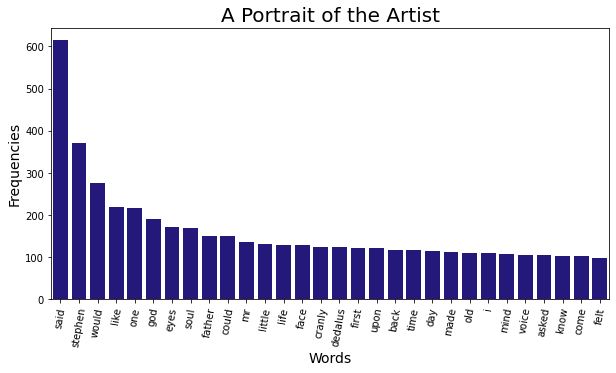

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


fig = plt.figure( figsize=( 10 , 5 ) )



graph = sns.barplot( x= list(most_frequent.keys()), y= list(most_frequent.values()) , color = '#19078c' , dodge=False )

graph.set_title('A Portrait of the Artist' , size = 20) 
graph.set_xlabel('Words' , size = 14) 
graph.set_ylabel('Frequencies' , size = 14 )

plt.xticks(rotation= 80)

plt.show()

## Type-token ratios of the chapters in the novel

In [9]:
ttr = []
chapters_id = []

words = tdmh.tokenise(full_text)
shortest = len(words)

## find the shortest chapter
for c in chapters:
    words = tdmh.tokenise(c)
    if len(words) < shortest:
        shortest = len(words)
        
for i,c in enumerate(chapters):
    words = tdmh.tokenise(c)
    words = words[:shortest]
    tokens = len(words)
    types = len(set(words))
    ttr.append(types/tokens)
    chapters_id.append(i+1)
    


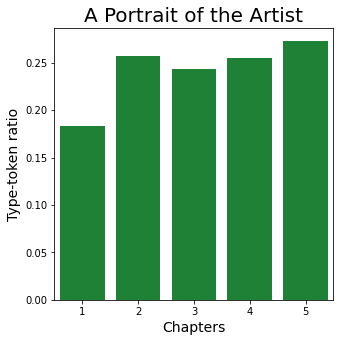

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


fig = plt.figure( figsize=(5,5) )



graph = sns.barplot( x= chapters_id, y= ttr, color = '#0d912e' , dodge=False )

graph.set_title('A Portrait of the Artist' , size = 20) 
graph.set_xlabel('Chapters' , size = 14) 
graph.set_ylabel('Type-token ratio' , size = 14 )



plt.show()

## Frequencies per segment

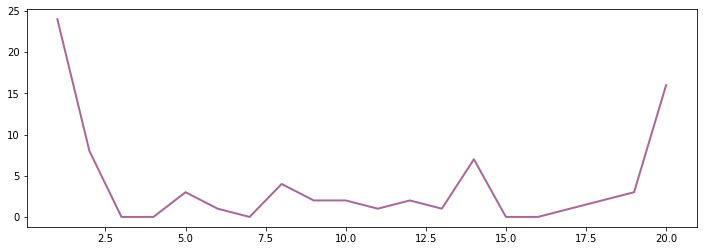

In [11]:
segments = []
nr_segments = 20
keyword = 'mother'

all_words = tdmh.tokenise( full_text )
segmentSize = int( len(all_words) / nr_segments )

count_words = 0
text = ''

for word in all_words:
    count_words += 1
    text += word + ' '

    ## This line below used the modulo operator:
    ## We can use it to test if the first number is
    ## divisible by the second number
    if count_words % segmentSize == 0:
        segments.append(text.strip())
        text = ''


segment_freq = []        
for s in segments:
    hits = re.findall( keyword, s , re.IGNORECASE )
    segment_freq.append(len(hits))

    
fig = plt.figure( figsize = ( 12, 4))
ax = sns.lineplot( x= range(1,nr_segments+1), y=  segment_freq , 
                  color= '#AA6799', linestyle='solid',linewidth=2 )

plt.show()       